# Caida de P$P (Guatemala)

## Conexión con AWS300

In [1]:
import pandas as pd
import numpy as np
import pyodbc
import warnings
warnings.filterwarnings('ignore')
conn = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=AWNTS300;DATABASE=DATALAB;UID=usrdm;PWD=dm$2Admin4')

In [2]:
 #Falta afinar para que sea por país y por campaña
#df = pd.read_sql("select * from [dbo].[CR_INPUT1_PDP]" , conn)
df = pd.read_sql("select * from [dbo].[CR_INPUT1_PDP]" , conn)

#df = pd.read_excel('output.xlsx')
#writer = pd.ExcelWriter('output.xlsx')
#df.to_excel(writer,'Sheet1')
#writer.save()

In [3]:
df.head()

,Pkebelista,v201711,v201712,v201713,v201715,Target,Pedidos_ult_18camp,DecilAñoAnterior,PMNPAñoAnterior,DecilCampAnterior,...,ppu201713,Q201711,Q201712,Q201713,FlagIpUnicoZona,pd201711,pd201712,pd201713,CodComportamientoRolling,FechaNacimiento
0,720,6979.771274,4200.445514,6724.908075,8758.605493,0,18,1.0,7152.190837,1,...,8.151404,24,17,25,1,0,0,0,4,1969-02-21
1,89964,2154.041014,2141.305731,2091.087431,2224.961983,0,18,9.0,2047.940153,7,...,12.673257,7,7,5,0,0,0,0,6,1978-12-01
2,90836,1889.314461,3063.642365,2054.850645,4617.455549,0,18,8.0,2190.827464,7,...,8.895457,8,8,7,1,0,0,0,6,1990-11-12
3,263422,2375.302251,2115.988981,2185.302904,5885.626802,0,18,6.0,2650.747593,6,...,16.555325,7,7,4,1,0,0,0,6,1992-05-28
4,267409,1843.579517,1349.515027,1269.000250,2603.406096,0,9,NaN,NaN,10,...,8.751726,5,5,5,1,1,0,0,6,1993-06-01


In [4]:
df[df.Pkebelista == 39]



,Pkebelista,v201711,v201712,v201713,v201715,Target,Pedidos_ult_18camp,DecilAñoAnterior,PMNPAñoAnterior,DecilCampAnterior,...,ppu201713,Q201711,Q201712,Q201713,FlagIpUnicoZona,pd201711,pd201712,pd201713,CodComportamientoRolling,FechaNacimiento
6734,39,28378.70436,28932.354438,35910.672637,24824.20535,1,18,1.0,26915.802299,1,...,11.828285,77,72,92,1,1,0,0,2,1950-07-13


In [5]:
print('La base de datos cuenta con ' + str(df.shape[0]) + ' filas y ' 
      + str(df.shape[1]) +' columnas.')


La base de datos cuenta con 15605 filas y 26 columnas.


In [6]:
#Eliminamos las filas que contengan valores NULL en campos donde no deberían tener.

df = df.dropna(axis=0, how='all', subset=['FechaNacimiento'])

In [7]:
def PromVariacion (num1, num2, num3):
    var1 = ((num2/num1)-1)
    var2 = ((num3/num2)-1)
    PromVar = (var1+var2)/2
    return PromVar*100


In [8]:
df['VarVentas3Camp'] = PromVariacion(df.v201711,df.v201712,df.v201713)
df['VarMCT3Camp'] =PromVariacion(df.mct201711,df.mct201712,df.mct201713)
df['VarPPU3Camp'] =PromVariacion(df.ppu201711,df.ppu201712,df.ppu201713)
df['VarPPU3Camp'] =PromVariacion(df.Q201711,df.Q201712,df.Q201713)
df['PD3Camp'] = df.pd201711 + df.pd201712 +df.pd201713


In [9]:
df1 = df.drop(['v201711', 'v201712','v201713','v201715','mct201711','mct201712','mct201713','ppu201711','ppu201712','ppu201713',
               'Q201711', 'Q201712', 'Q201713', 'pd201711', 'pd201712', 'pd201713'], axis=1)


In [10]:
pd.DataFrame(df1.dtypes, columns = ['Tipo de dato'])

,Tipo de dato
Pkebelista,int64
Target,int64
Pedidos_ult_18camp,int64
DecilAñoAnterior,float64
PMNPAñoAnterior,float64
DecilCampAnterior,int64
PMNPCampAnterior,float64
FlagIpUnicoZona,int64
CodComportamientoRolling,int64
FechaNacimiento,datetime64[ns]


In [11]:
df1['Target'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

0    9204
1    6401
Name: Target, dtype: int64

In [13]:
import datetime as DT
import numpy as np
import io

now = pd.Timestamp(DT.datetime.now())
df1['FechaNacimiento'] = df1['FechaNacimiento'].where(df1['FechaNacimiento'] < now, df1['FechaNacimiento'] -  np.timedelta64(100, 'Y'))   # 2
df1['Edad'] = (now - df1['FechaNacimiento']).astype('<m8[Y]')    # 3

df2 = df1.drop(['FechaNacimiento'], axis=1)

In [14]:
pd.DataFrame(df2.dtypes, columns = ['Tipo de dato'])

,Tipo de dato
Pkebelista,int64
Target,int64
Pedidos_ult_18camp,int64
DecilAñoAnterior,float64
PMNPAñoAnterior,float64
DecilCampAnterior,int64
PMNPCampAnterior,float64
FlagIpUnicoZona,int64
CodComportamientoRolling,int64
VarVentas3Camp,float64


In [15]:
df2.describe()

,Pkebelista,Target,Pedidos_ult_18camp,DecilAñoAnterior,PMNPAñoAnterior,DecilCampAnterior,PMNPCampAnterior,FlagIpUnicoZona,CodComportamientoRolling,VarVentas3Camp,VarMCT3Camp,VarPPU3Camp,PD3Camp,Edad
count,15605.000000,15605.000000,15605.000000,13389.000000,13389.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000
mean,195126.126370,0.410189,15.488561,5.499664,3266.200045,5.499199,3009.730870,0.372445,5.717655,12.554007,11.016673,16.658453,0.322845,39.920346
std,92750.457536,0.491884,3.320055,2.872233,2361.674620,2.872373,2349.897689,0.483471,0.709639,39.349584,39.523005,49.061038,0.724985,12.929655
min,39.000000,0.000000,3.000000,1.000000,545.821340,1.000000,116.138803,0.000000,2.000000,-74.927721,-74.166667,-77.976190,0.000000,10.000000
25%,117739.000000,0.000000,14.000000,3.000000,2263.271511,3.000000,1904.966350,0.000000,5.000000,-7.772329,-12.500000,-10.000000,0.000000,29.000000
50%,216946.000000,0.000000,17.000000,5.000000,2790.398827,5.000000,2404.716542,0.000000,6.000000,6.065071,4.166667,7.777778,0.000000,38.000000
75%,278756.000000,1.000000,18.000000,8.000000,3632.813576,8.000000,3454.091922,1.000000,6.000000,24.934718,25.000000,30.000000,0.000000,49.000000
max,312147.000000,1.000000,18.000000,10.000000,96510.051673,10.000000,76045.373449,1.000000,7.000000,1826.310517,541.666667,988.095238,7.000000,100.000000


# Exploración y visualización

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)
count    15605.000000
mean      3009.730870
std       2349.897689
min        116.138803
25%       1904.966350
50%       2404.716542
75%       3454.091922
max      76045.373449
Name: PMNPCampAnterior, dtype: float64


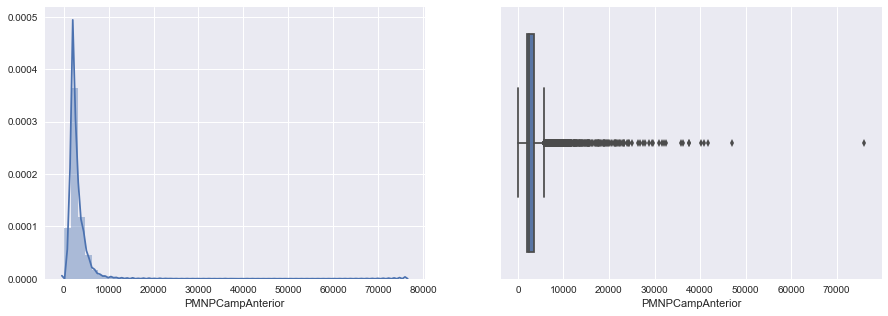

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


'''def VarDescr (x):
    sns.set()
    fig, ax = plt.subplots(figsize=(15,5), ncols=2)
    sns.set_style("whitegrid")
    print(sns.distplot(x, ax = ax[0]))
    print(sns.boxplot(x=x, ax = ax[1]))
    print(x.describe())

VarDescr(df2['PMNPCampAnterior'])'''

from pandas.plotting import table and table(ax[2], np.round(df2['VarMCT3Camp'].describe(), 2))

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


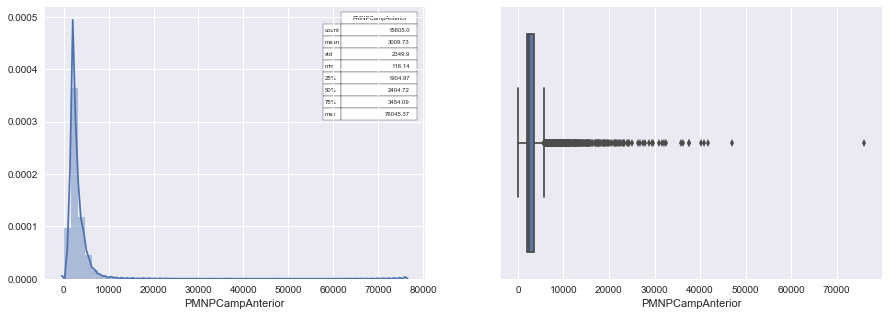

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table 
%matplotlib inline



sns.set()
fig, ax = plt.subplots(figsize=(15,5), ncols=2)
sns.set_style("whitegrid")
table(ax[0], np.round(df2['PMNPCampAnterior'].describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2])
print(sns.distplot(df2['PMNPCampAnterior'], ax = ax[0]))
print(sns.boxplot(x=df2['PMNPCampAnterior'], ax = ax[1]))



AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)
count    15605.000000
mean        15.488561
std          3.320055
min          3.000000
25%         14.000000
50%         17.000000
75%         18.000000
max         18.000000
Name: Pedidos_ult_18camp, dtype: float64


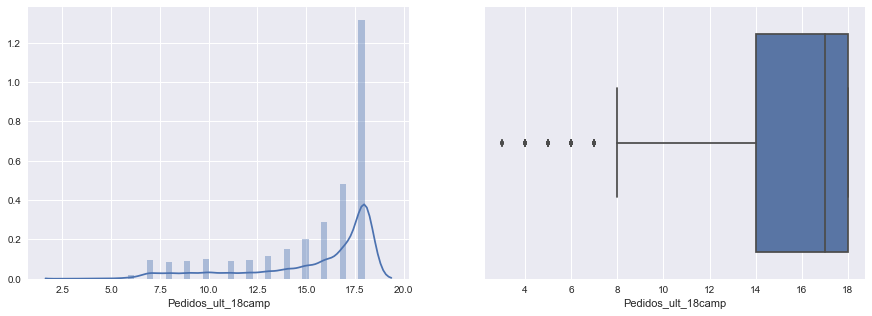

In [120]:
VarDescr(df2['Pedidos_ult_18camp'])

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)
count    15605.000000
mean        16.658453
std         49.061038
min        -77.976190
25%        -10.000000
50%          7.777778
75%         30.000000
max        988.095238
Name: VarPPU3Camp, dtype: float64


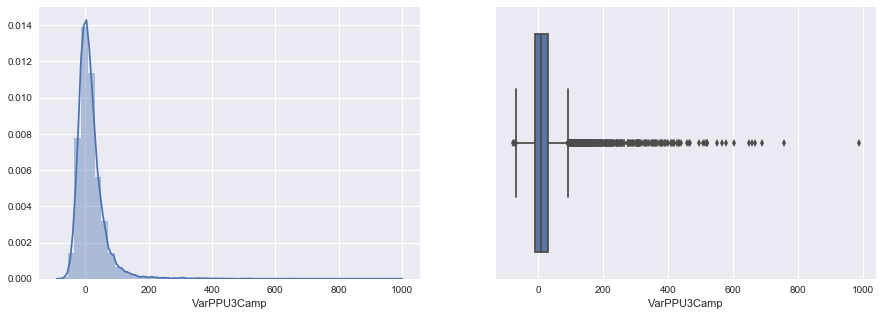

In [121]:
VarDescr(df2['VarPPU3Camp'])

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
def corr_1(df):
    sns.set(style="white") 
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(10, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    return sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

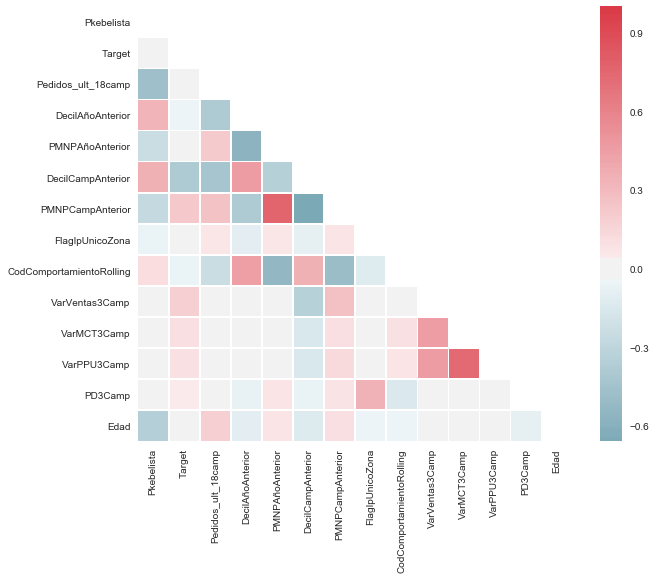

In [33]:
%matplotlib inline

corr_1(df2)

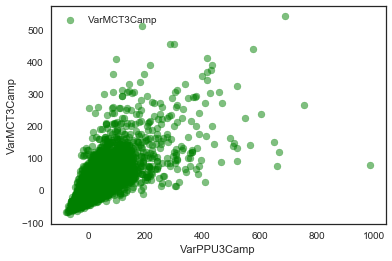

In [34]:
import matplotlib.pyplot as plt
import matplotlib

plt.scatter(df2.VarPPU3Camp, df2.VarMCT3Camp, c="g", alpha=0.5, marker='o')
plt.xlabel("VarPPU3Camp")
plt.ylabel("VarMCT3Camp")
plt.legend(loc=2)
plt.show()

In [2]:
test = pd.DataFrame()

NameError: name 'pd' is not defined

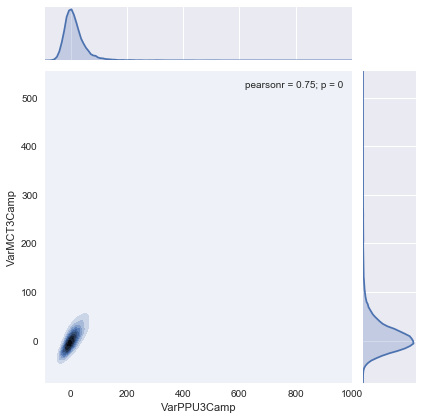

In [64]:
sns.jointplot(x=df2.VarPPU3Camp, y=df2.VarMCT3Camp, data=df2, kind="kde");

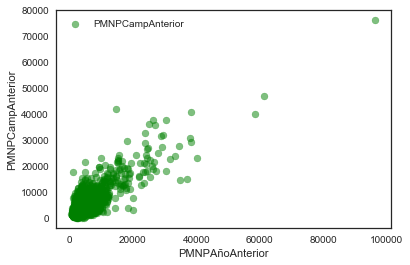

In [35]:
import matplotlib.pyplot as plt
import matplotlib

plt.scatter(df2.PMNPAñoAnterior, df2.PMNPCampAnterior, c="g", alpha=0.5, marker='o')
plt.xlabel("PMNPAñoAnterior")
plt.ylabel("PMNPCampAnterior")
plt.legend(loc=2)
plt.show()

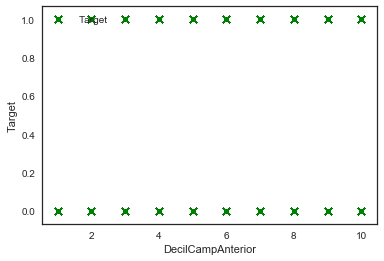

In [22]:
import matplotlib.pyplot as plt
import matplotlib

plt.scatter(df2.DecilCampAnterior, df2.Target, c="g", alpha=0.05, marker='x')
plt.xlabel("DecilCampAnterior")
plt.ylabel("Target")
plt.legend(loc=2)
plt.show()

## Modelo

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

from xgboost import XGBClassifier


C:\Users\cfabbri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
from sklearn.preprocessing import Imputer
df21 = df2.fillna(0)
df21 = df21.drop(['Pkebelista'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(
df21.loc[:, df21.columns != 'Target'],
 df21[u'Target'].values, 
 test_size=0.15, 
 random_state=42)

xg = XGBClassifier()
xg.fit(X_train, y_train)

print(xg)


y_pred = xg.predict(X_test)
predictions = [round(value) for value in y_pred]

print(classification_report(y_test, y_pred))


scores = cross_val_score(xg, df21.loc[:, df21.columns != 'Target'],df21[u'Target'].values,  cv=6)
print('Cross-validated scores: ', scores, 'prom', np.mean(scores))

#feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns, 
#columns=['importance']).sort_values('importance', ascending=False)

#print(feature_importances)





XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
             precision    recall  f1-score   support

          0       0.73      0.77      0.75      1342
          1       0.67      0.62      0.65       999

avg / total       0.71      0.71      0.71      2341

Cross-validated scores:  [ 0.71049596  0.72818147  0.71203383  0.71395617  0.70934256  0.71692308] prom 0.71515551218


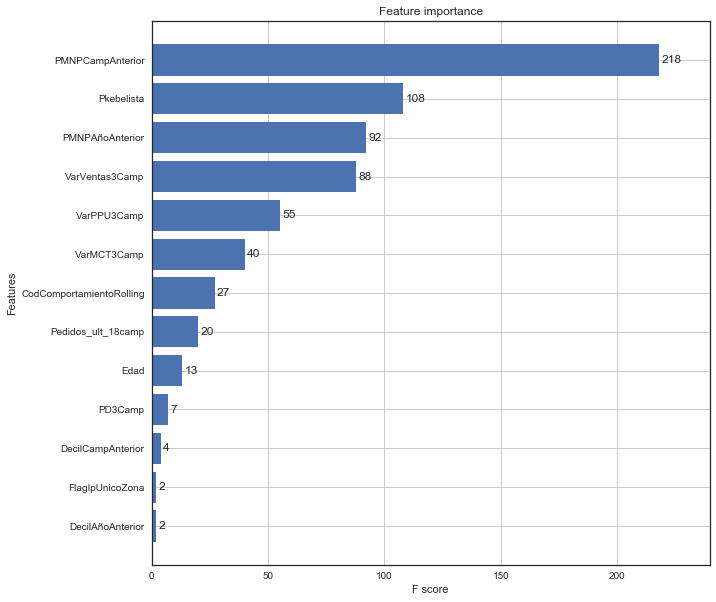

In [39]:
import xgboost as xgb
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xg, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [26]:
# 1. Borrando filas con NA en datos del año anterior: trabajamos solo con registros de los cuales se tiene data desde el año pasado.
#df21 = df2.dropna(axis=0, how='all', subset=['DecilAñoAnterior', 'PMNPAñoAnterior'])
# reemplazando NA con un valor para que entren al modelo las filas de las nuevas y no se queden sin estimación.
df21 = df2.fillna(0)
df21 = df21.drop(['Pkebelista'], axis=1)

print(df21.shape)
print(df21.isnull().values.any())


X_train, X_test, y_train, y_test = train_test_split(
df21.loc[:, df21.columns != 'Target'],
 df21[u'Target'].values, 
 test_size=0.15, 
 random_state=42)


niveles_arbol = 5
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = niveles_arbol)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))


scores = cross_val_score(clf, df21.loc[:, df21.columns != 'Target'],df21[u'Target'].values,  cv=6)
print('Cross-validated scores: ', scores, 'prom', np.mean(scores))

feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns, 
columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

(15605, 13)
False
             precision    recall  f1-score   support

          0       0.73      0.75      0.74      1342
          1       0.65      0.62      0.63       999

avg / total       0.69      0.69      0.69      2341

Cross-validated scores:  [ 0.69742407  0.71049596  0.69665513  0.70049981  0.70818916  0.7       ] prom 0.702210688197
                          importance
PMNPCampAnterior            0.770596
PMNPAñoAnterior             0.172731
Pedidos_ult_18camp          0.018922
VarVentas3Camp              0.016660
CodComportamientoRolling    0.010808
VarPPU3Camp                 0.006945
Edad                        0.003338
DecilAñoAnterior            0.000000
DecilCampAnterior           0.000000
FlagIpUnicoZona             0.000000
VarMCT3Camp                 0.000000
PD3Camp                     0.000000


In [27]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.70      0.82      0.75      1342
          1       0.68      0.53      0.60       999

avg / total       0.69      0.69      0.69      2341



In [28]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred) 

In [29]:
from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()


In [30]:
labels = ['Sí Cae', 'Sube o Mantiene']
print_cm(cnf_matrix, labels)

                             Sí Cae Sube o Mantiene 
             Sí Cae          1099.0           243.0 
    Sube o Mantiene           473.0           526.0 


In [31]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns, 
columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                          importance
PMNPCampAnterior            0.770596
PMNPAñoAnterior             0.172731
Pedidos_ult_18camp          0.018922
VarVentas3Camp              0.016660
CodComportamientoRolling    0.010808
VarPPU3Camp                 0.006945
Edad                        0.003338
DecilAñoAnterior            0.000000
DecilCampAnterior           0.000000
FlagIpUnicoZona             0.000000
VarMCT3Camp                 0.000000
PD3Camp                     0.000000


# Next steps

- Hacer que el query de la tabla se actualice automaticamente desde este script

- Traerlo a Dolar

- Probar con otros países y campañas

- Probar otros algoritmos (XGBoost, LightGBM)

- Validar variables con visión de negocio, incorporar nuevas



- BONUS: Integrar con arquitectura AWS

In [32]:
normalizar variables (normalizer) antes de xgboost
ver distribucion de los datos para encontrar outlier (o graficos de cajas)
perfilar consultoras para ponerle perfiles a las que no estaban hace un año

t-sne
https://seaborn.pydata.org/generated/seaborn.distplot.html

SyntaxError: invalid syntax (<ipython-input-32-37f51a4826c3>, line 1)